In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Importing the libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#Importing the dataset
titanic_file_path_train = '/kaggle/input/titanic/train.csv'


titanic_train = pd.read_csv(titanic_file_path_train)


print("Dataset ready!")

Dataset ready!


In [3]:
#Reading and understanding the dataset
print("Shape : ", titanic_train.shape)

Shape :  (891, 12)


In [4]:
# Dropping any NaN values if there are any

rawdata = titanic_train.dropna(axis=1)

#Reading and understanding the dataset
print("Shape : ", rawdata.shape)

Shape :  (891, 9)


In [5]:
print('Data Info:\n')
print(rawdata.info())

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB
None


In [6]:
#Also, there are no null values.

print('Feature count of missing values: \n')
print(rawdata.isnull().sum())

Feature count of missing values: 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


Relationships Between Variabels: 



<function matplotlib.pyplot.show(close=None, block=None)>

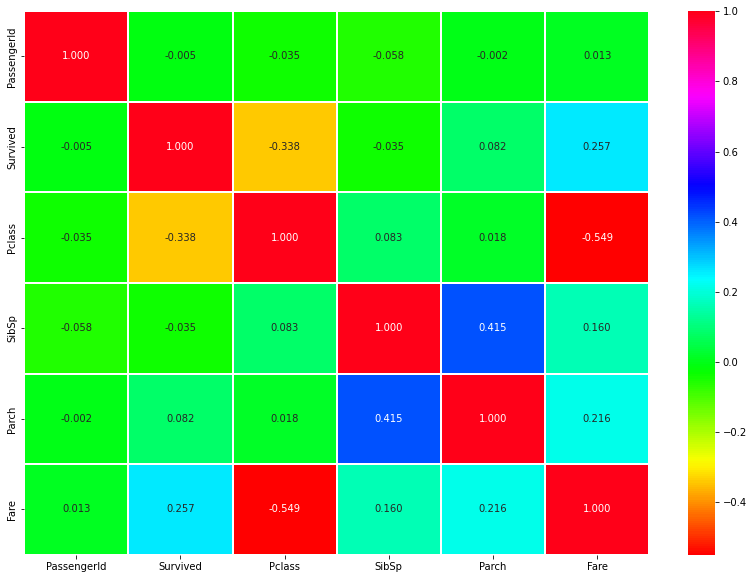

In [7]:
#Finding the feature corelations

print("Relationships Between Variabels: \n")
plt.figure(figsize=(14,10))
sns.heatmap(rawdata.corr(), annot=True, cmap='hsv', fmt='.3f', 
linewidths=2)
plt.show

Text(0.5, 1.0, 'Correlation Between Survival and Sex')

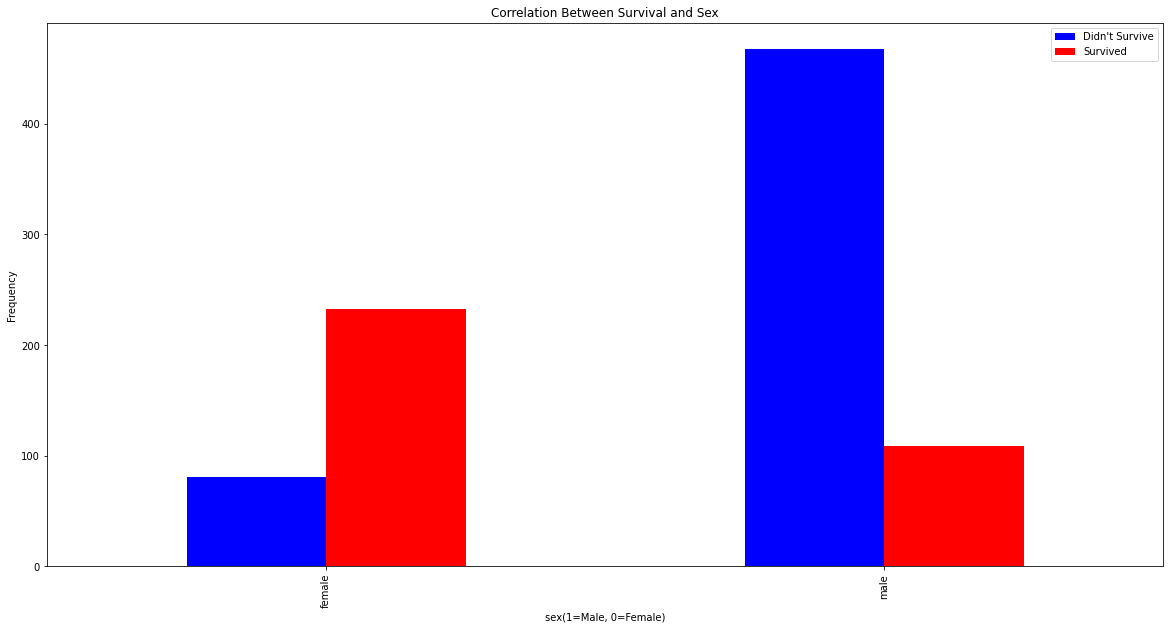

In [8]:
#Correlation between sex & target
#Relationship with numerical variables
#barplot sex/target

pd.crosstab(rawdata.Sex,rawdata.Survived).plot(kind="bar",
figsize=(20,10), color=['blue','red'])
plt.xlabel('sex(1=Male, 0=Female)')
plt.ylabel('Frequency')
plt.legend(['Didn\'t Survive', 'Survived'])
plt.title('Correlation Between Survival and Sex')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


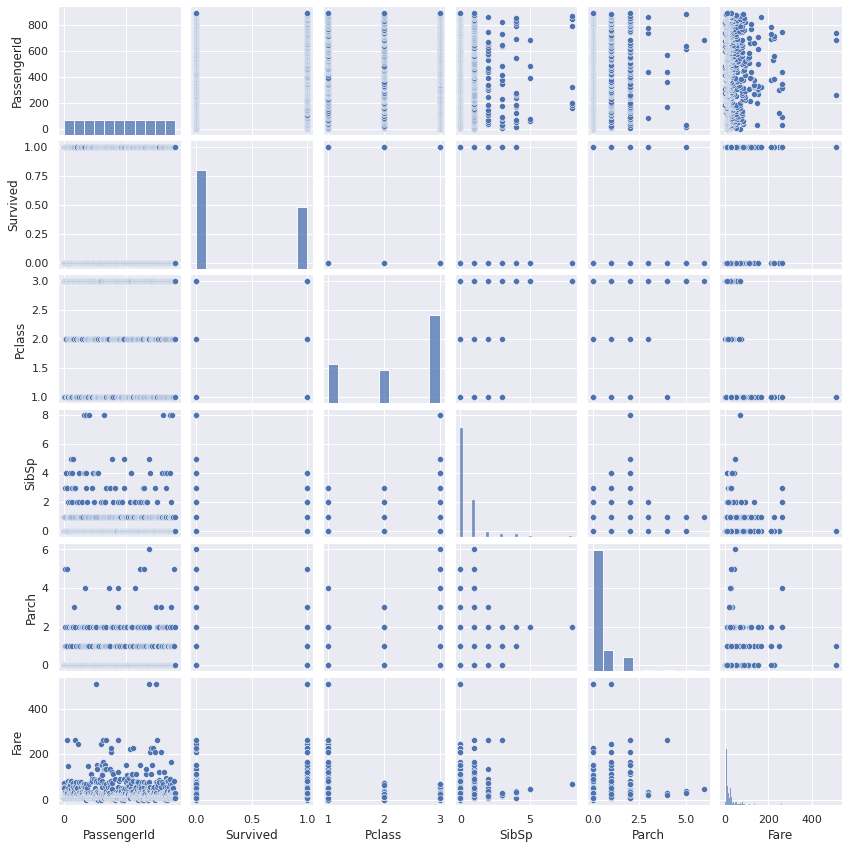

In [9]:
# Selecting Features

#scatterplot
sns.set()
train_features = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 
                 'Parch', 'Fare']
sns.pairplot(rawdata[train_features], size = 2)
plt.show();

In [10]:
#Manually updating the feature values with labels

rawdata['Sex'][rawdata['Sex'] == 'female'] = 0
rawdata['Sex'][rawdata['Sex'] == 'male'] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [11]:
#Preparing the features and splitting the target variable from the dataset

y = rawdata['Survived']
X = rawdata[train_features]
print("Shape of y:", y.shape)

Shape of y: (891,)


In [12]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [13]:
#Creating Random Forest Model
#Random Forest preparation

modelRF = RandomForestRegressor(random_state=0)
modelRF.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Accuracy of the model:  100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        84

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



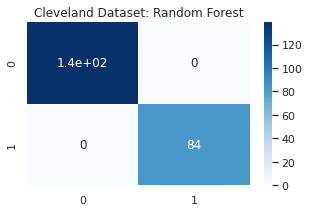

In [14]:
modelRF = RandomForestClassifier(n_estimators = 50, max_depth = 5)
modelRF.fit(X_train, y_train)
y_predict = modelRF.predict(X_test)
y_pred_quant = modelRF.predict_proba(X_test)[:, 1]
y_pred = modelRF.predict(X_test)

#Evaluating the model
accRF = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ", round(accRF*100,2),"%")
# print("Training Accuracy :", model.score(x_train, y_train))
# print("Testing Accuracy  :", model.score(x_test, y_test))
print("")

#Confusion matrix
cmRF = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cmRF, annot = True, annot_kws = {'size':12}, cmap = 'Blues').set(title="Cleveland Dataset: Random Forest")

#Classification report
crRF = classification_report(y_test, y_pred)
print(crRF)

In [15]:
#Breakdown of the Precision, Recall, and F-Score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

recallLR = recall_score(y_test, y_pred)
print("Recall is: ",recallLR)

precisionLR = precision_score(y_test, y_pred)
print("Precision is: ",precisionLR)

f1_metricLR = f1_score(y_test, y_pred, average = "macro")
print('F-Score:', f1_metricLR)

Recall is:  1.0
Precision is:  1.0
F-Score: 1.0
